In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import pickle

In [3]:
# Surpress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [5]:
# Retrieve dataset and read first 5 rows
macroNutrient_removeRow =pd.read_csv(r"../Dataset/Dataset_for_EDA/macroNutrient_removeRow.csv", encoding= 'unicode_escape')
macroNutrient_removeRow

No.                                        Description       Category  \
0     15155                          ABALONE,MIXED SPECIES,RAW        ABALONE   
1     15156                           ABALONE,MXD SP,CKD,FRIED        ABALONE   
2      9002                                  ACEROLA JUICE,RAW  ACEROLA JUICE   
3      9001                   ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA   
4     12060                               ACORN FLOUR,FULL FAT    ACORN FLOUR   
...     ...                                                ...            ...   
8110   1119        YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ         YOGURT   
8111   1220  YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FO...         YOGURT   
8112   1295                             YOGURT,VANILLA,NON-FAT         YOGURT   
8113  16004                 YOKAN,PREP FROM ADZUKI BNS & SUGAR          YOKAN   
8114   3217                                           ZWIEBACK       ZWIEBACK   

      Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0               105             6.01       17.10            0.76   
1               189            11.05       19.63            6.78   
2                23             4.80        0.40            0.30   
3                32             7.69        0.40            0.30   
4               501            54.65        7.49           30.17   
...             ...              ...         ...             ...   
8110             85            13.80        4.93            1.25   
8111             85            13.80        4.93            1.25   
8112             78            17.04        2.94            0.00   
8113            260            60.72        3.29            0.12   
8114            426            74.20       10.10            9.70   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                              0.107                           0.104   
1                              2.741                           1.676   
2                              0.082                           0.090   
3                              0.082                           0.090   
4                             19.110                           5.813   
...                              ...                             ...   
8110                           0.343                           0.036   
8111                           0.343                           0.036   
8112                           0.000                           0.000   
8113                           0.011                           0.026   
8114                           4.244                           2.073   

      Saturated Fatty Acids(g)  
0                        0.149  
1                        1.646  
2                        0.068  
3                        0.068  
4                        3.923  
...                        ...  
8110                     0.806  
8111                     0.806  
8112                     0.000  
8113                     0.043  
8114                     2.525  

[8115 rows x 10 columns]

In [6]:
macroNutrient_removeRow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8115 entries, 0 to 8114
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No.                             8115 non-null   int64  
 1   Description                     8115 non-null   object 
 2   Category                        8115 non-null   object 
 3   Energy (Kcal)                   8115 non-null   int64  
 4   Carbohydrate(g)                 8115 non-null   float64
 5   Protein(g)                      8115 non-null   float64
 6   Total Lipid(g)                  8115 non-null   float64
 7   Monounsaturated Fatty Acids(g)  8115 non-null   float64
 8   Polyunsaturated Fatty Acids(g)  8115 non-null   float64
 9   Saturated Fatty Acids(g)        8115 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 634.1+ KB


In [7]:
macroNutrient_removeRow.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8115.000000    8115.000000      8115.000000  8115.000000   
mean   15654.863709     233.115835        22.287736    11.886847   
std     9220.251191     169.375926        27.489392    10.547686   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9101.500000     104.000000         0.000000     2.750000   
50%    14541.000000     199.000000         9.200000     8.860000   
75%    20459.500000     342.000000        37.640000    20.450000   
max    93600.000000     902.000000       100.000000    88.320000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8115.000000                     8115.000000   
mean        11.026070                        4.081442   
std         16.036339                        7.013172   
min          0.000000                        0.000000   
25%          1.220000                        0.235500   
50%          5.730000                        1.939000   
75%         14.355000                        5.113500   
max        100.000000                       83.689000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8115.000000               8115.000000  
mean                         2.289976                  3.631678  
std                          5.218429                  6.592824  
min                          0.000000                  0.000000  
25%                          0.220000                  0.244000  
50%                          0.696000                  1.640000  
75%                          2.082000                  4.389000  
max                         74.623000                 95.600000

In [8]:
macroNutrient_removeRow.head()

No.                       Description       Category  Energy (Kcal)  \
0  15155         ABALONE,MIXED SPECIES,RAW        ABALONE            105   
1  15156          ABALONE,MXD SP,CKD,FRIED        ABALONE            189   
2   9002                 ACEROLA JUICE,RAW  ACEROLA JUICE             23   
3   9001  ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA             32   
4  12060              ACORN FLOUR,FULL FAT    ACORN FLOUR            501   

   Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0             6.01       17.10            0.76   
1            11.05       19.63            6.78   
2             4.80        0.40            0.30   
3             7.69        0.40            0.30   
4            54.65        7.49           30.17   

   Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.107                           0.104   
1                           2.741                           1.676   
2                           0.082                           0.090   
3                           0.082                           0.090   
4                          19.110                           5.813   

   Saturated Fatty Acids(g)  
0                     0.149  
1                     1.646  
2                     0.068  
3                     0.068  
4                     3.923

In [9]:
float_columns = [x for x in macroNutrient_removeRow.columns if x not in ['No.', 'Description', 'Category']]

In [10]:
skew_columns = (macroNutrient_removeRow[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
print("{} of the 7 columns are skewed with the vast majority being heavily skewed".format(len(skew_columns)))
skew_columns

7 of the 7 columns are skewed with the vast majority being heavily skewed


Saturated Fatty Acids(g)          6.588716
Polyunsaturated Fatty Acids(g)    6.149478
Monounsaturated Fatty Acids(g)    4.561471
Total Lipid(g)                    3.249736
Energy (Kcal)                     1.131878
Carbohydrate(g)                   1.094421
Protein(g)                        1.088549
dtype: float64

In [11]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    macroNutrient_removeRow[col] = np.log1p(macroNutrient_removeRow[col])

In [12]:
macroNutrient_removeRow[float_columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          4.663439         1.947338    2.895912        0.565314   
1          5.247024         2.489065    3.026746        2.051556   
2          3.178054         1.757858    0.336472        0.262364   
3          3.496508         2.162173    0.336472        0.262364   
4          6.218600         4.019082    2.138889        3.439456   
...             ...              ...         ...             ...   
8110       4.454347         2.694627    1.780024        0.810930   
8111       4.454347         2.694627    1.780024        0.810930   
8112       4.369448         2.892592    1.371181        0.000000   
8113       5.564520         4.122608    1.456287        0.113329   
8114       6.056784         4.320151    2.406945        2.370244   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.101654                        0.098940   
1                           1.319353                        0.984323   
2                           0.078811                        0.086178   
3                           0.078811                        0.086178   
4                           3.001217                        1.918833   
...                              ...                             ...   
8110                        0.294906                        0.035367   
8111                        0.294906                        0.035367   
8112                        0.000000                        0.000000   
8113                        0.010940                        0.025668   
8114                        1.657085                        1.122654   

      Saturated Fatty Acids(g)  
0                     0.138892  
1                     0.973049  
2                     0.065788  
3                     0.065788  
4                     1.593918  
...                        ...  
8110                  0.591114  
8111                  0.591114  
8112                  0.000000  
8113                  0.042101  
8114                  1.259880  

[8115 rows x 7 columns]

In [13]:
macroNutrient_removeRow.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8115.000000    8115.000000      8115.000000  8115.000000   
mean   15654.863709       5.116775         2.114265     2.114149   
std     9220.251191       0.967297         1.642419     1.051208   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9101.500000       4.653960         0.000000     1.321756   
50%    14541.000000       5.298317         2.322388     2.288486   
75%    20459.500000       5.837730         3.654287     3.065725   
max    93600.000000       6.805723         4.615121     4.492225   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8115.000000                     8115.000000   
mean         1.834451                        1.130769   
std          1.171290                        0.931380   
min          0.000000                        0.000000   
25%          0.797507                        0.211476   
50%          1.906575                        1.078069   
75%          2.731441                        1.810499   
max          4.615121                        4.438986   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8115.000000               8115.000000  
mean                         0.771293                  1.073106  
std                          0.760200                  0.887023  
min                          0.000000                  0.000000  
25%                          0.198851                  0.218332  
50%                          0.528273                  0.970779  
75%                          1.125579                  1.684360  
max                          4.325760                  4.570579

In [14]:
scaler = MinMaxScaler()
macroNutrient_removeRow[float_columns] = scaler.fit_transform(macroNutrient_removeRow[float_columns])

macroNutrient_removeRow.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8115.000000    8115.000000      8115.000000  8115.000000   
mean   15654.863709       0.751834         0.458117     0.470624   
std     9220.251191       0.142130         0.355878     0.234006   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9101.500000       0.683830         0.000000     0.294232   
50%    14541.000000       0.778509         0.503213     0.509433   
75%    20459.500000       0.857768         0.791808     0.682451   
max    93600.000000       1.000000         1.000000     1.000000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8115.000000                     8115.000000   
mean         0.397487                        0.254736   
std          0.253794                        0.209818   
min          0.000000                        0.000000   
25%          0.172803                        0.047641   
50%          0.413115                        0.242864   
75%          0.591846                        0.407863   
max          1.000000                        1.000000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8115.000000               8115.000000  
mean                         0.178302                  0.234786  
std                          0.175738                  0.194072  
min                          0.000000                  0.000000  
25%                          0.045969                  0.047769  
50%                          0.122122                  0.212397  
75%                          0.260204                  0.368522  
max                          1.000000                  1.000000

In [15]:
X = macroNutrient_removeRow[float_columns]
X

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
4          0.913731         0.870851    0.476131        0.745258   
...             ...              ...         ...             ...   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8112       0.642026         0.626764    0.305234        0.000000   
8113       0.817624         0.893283    0.324179        0.024556   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
4                           0.676104                        0.443583   
...                              ...                             ...   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8112                        0.000000                        0.000000   
8113                        0.002465                        0.005934   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.014394  
3                     0.014394  
4                     0.348734  
...                        ...  
8110                  0.129330  
8111                  0.129330  
8112                  0.000000  
8113                  0.009211  
8114                  0.275650  

[8115 rows x 7 columns]

## Dimensionality Reduction

In [16]:
from clustering_function import dimensionality_reduction,scatter_plot_clustering

In [17]:
# Reduced to 2 dimensions using tsne
X_tsne_reduced, tsne_x_data, tsne_y_data, reduction_method = dimensionality_reduction(X, 't-SNE', n_components=2)

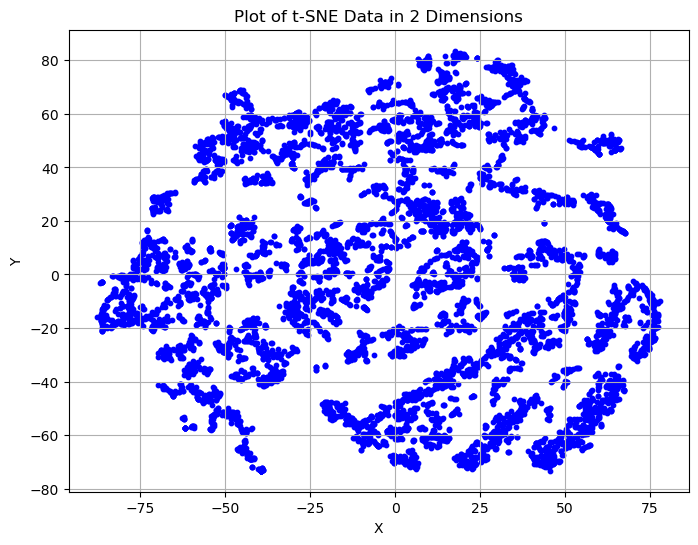

In [18]:
scatter_plot_clustering(tsne_x_data, tsne_y_data, reduction_method)

In [19]:
X_tsne_reduced

array([[-10.893087 , -27.97997  ],
       [ 11.038216 ,   0.4174367],
       [-60.97027  , -41.98372  ],
       ...,
       [-58.76225  ,   0.1944929],
       [-56.546238 ,  35.5658   ],
       [  2.853995 ,  39.991898 ]], dtype=float32)

In [20]:
pd.DataFrame(X_tsne_reduced).to_csv("../Dataset/Dataset_for_reduced_data/removeRow_reduced.csv")

In [21]:
# Reduced to 2 dimensions using pca
X_pca_reduced, pca_x_data, pca_y_data, reduction_method = dimensionality_reduction(X, 'PCA', n_components=2)

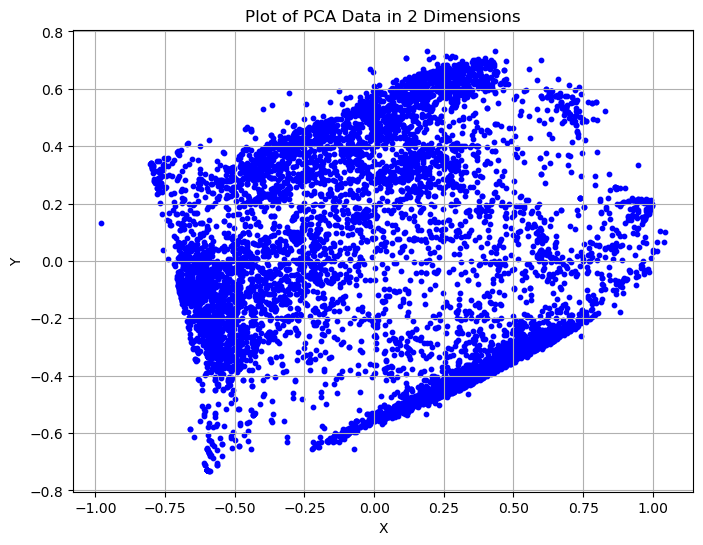

In [22]:
scatter_plot_clustering(pca_x_data, pca_y_data, reduction_method)

In [23]:
X_pca_reduced

array([[-0.31137033, -0.2478738 ],
       [ 0.08835786,  0.07482349],
       [-0.57461179, -0.27532157],
       ...,
       [-0.60526492, -0.07864089],
       [-0.64556844,  0.19944132],
       [ 0.01868934,  0.51117879]])

## K Means: Optimal number of clusters

#### Silhoutte Analysis

In [24]:
from clustering_function import plot_silhouette_analysis

For n_clusters = 2 The average silhouette_score is : 0.36734527
For n_clusters = 3 The average silhouette_score is : 0.42679524
For n_clusters = 4 The average silhouette_score is : 0.3829218
For n_clusters = 5 The average silhouette_score is : 0.37368083
For n_clusters = 6 The average silhouette_score is : 0.41428086
For n_clusters = 7 The average silhouette_score is : 0.4071822


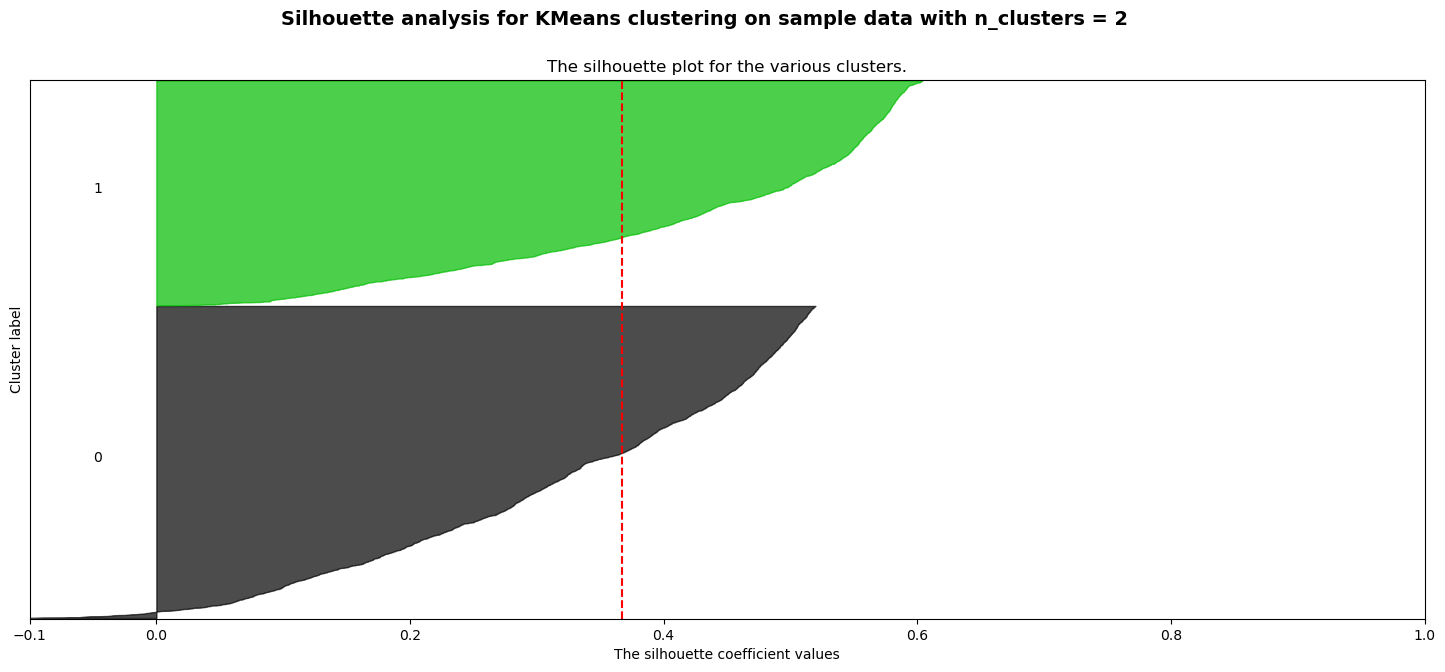

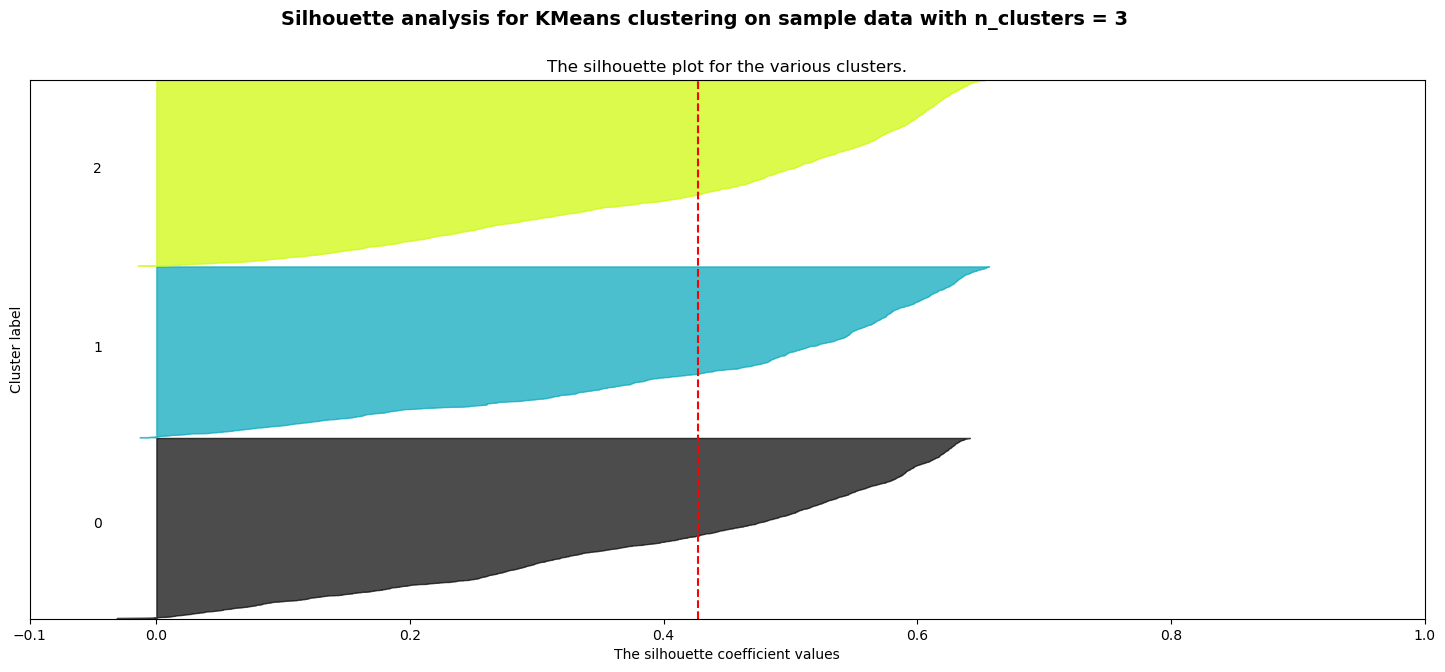

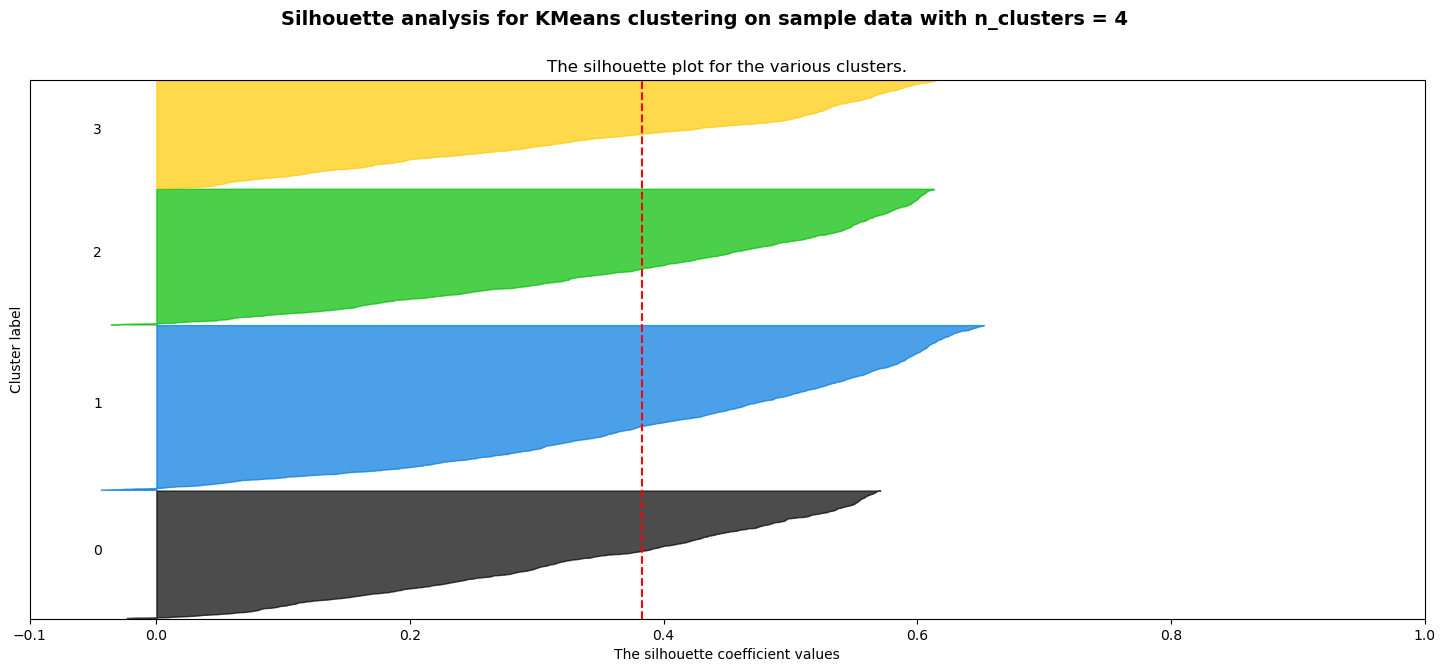

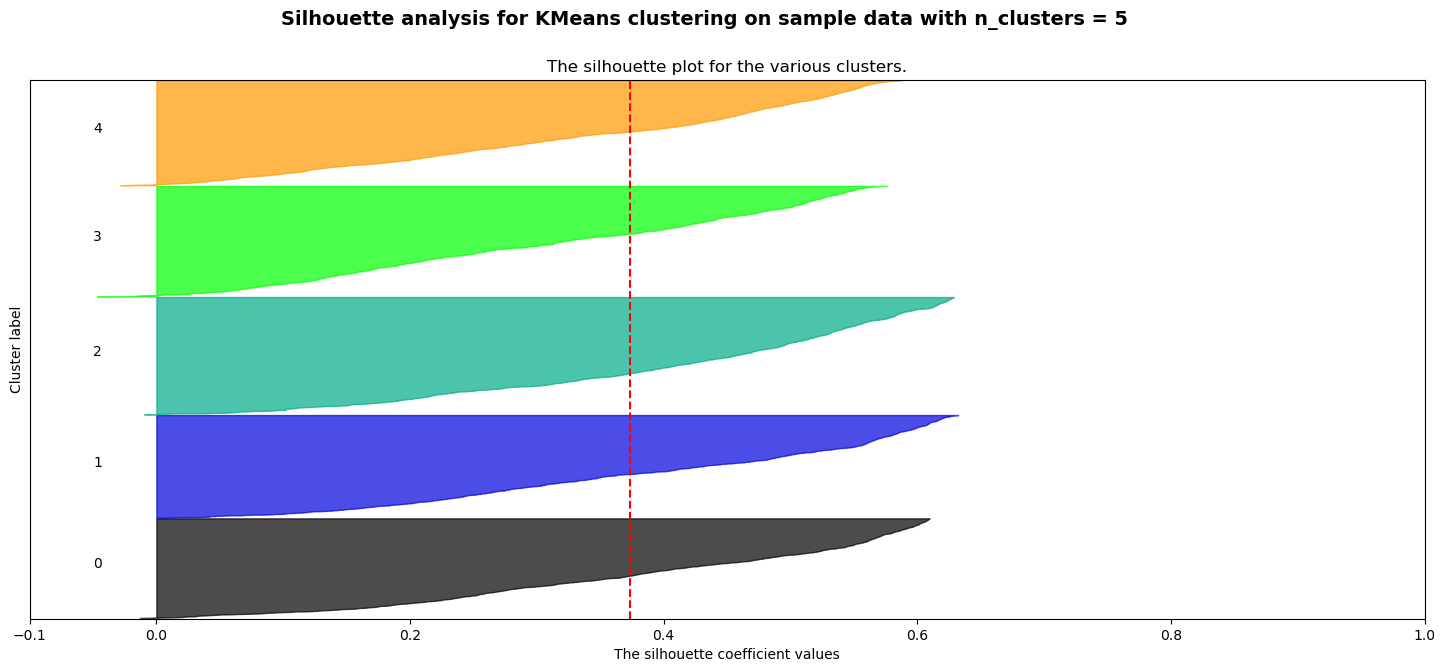

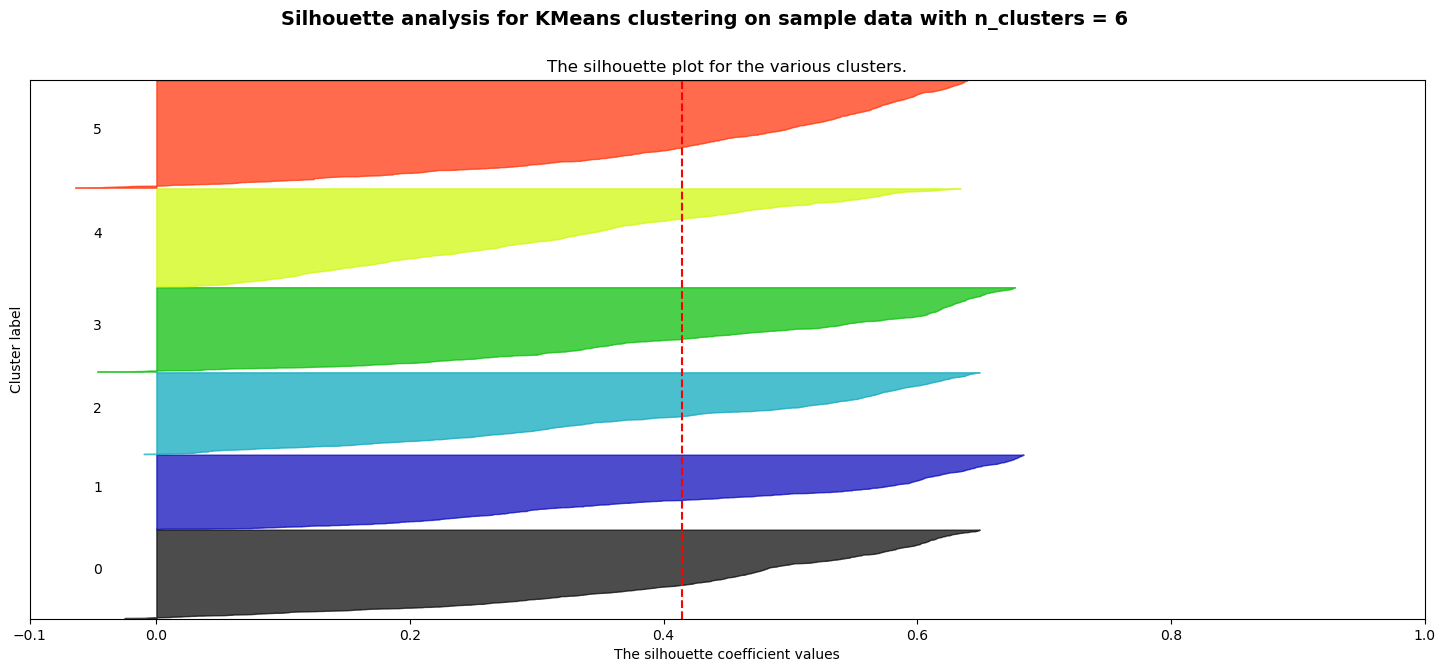

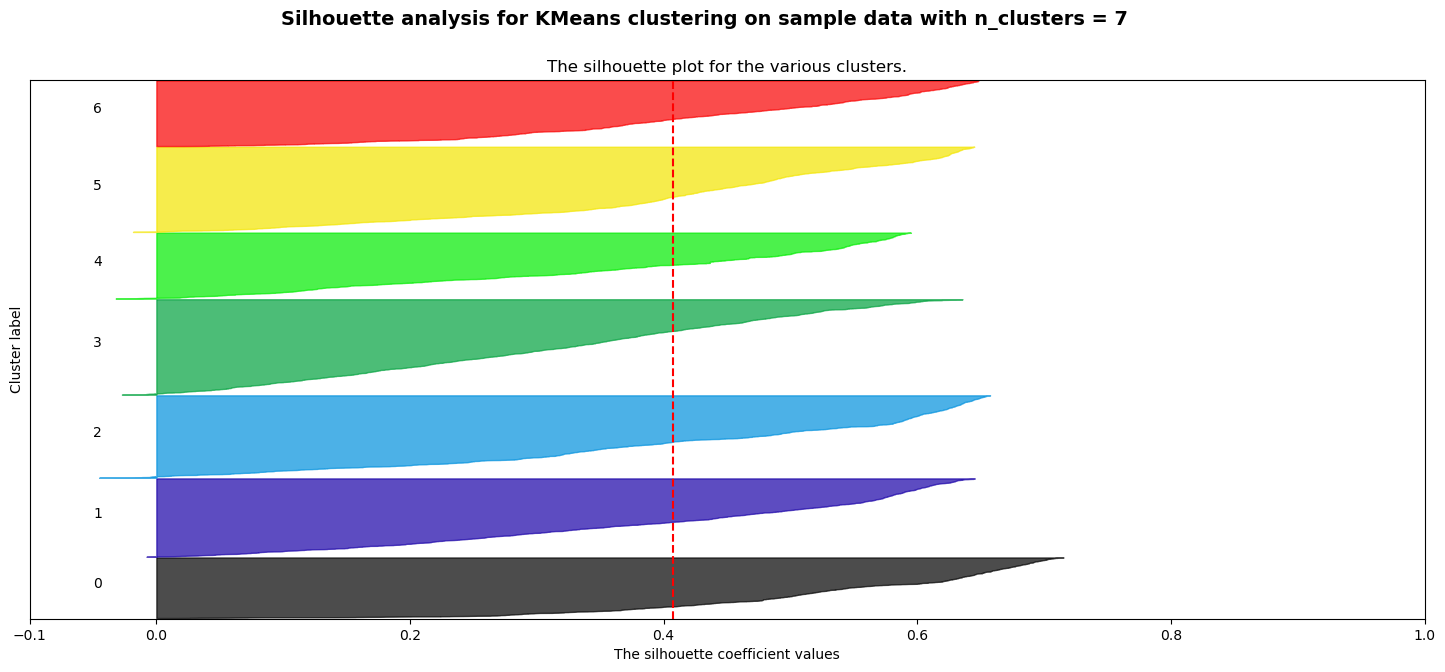

In [25]:
tsne_list_num_clusters = list(range(2,8))
plot_silhouette_analysis(X_tsne_reduced, tsne_list_num_clusters)

#### Elbow Method

In [26]:
from clustering_function import elbow_method_analysis

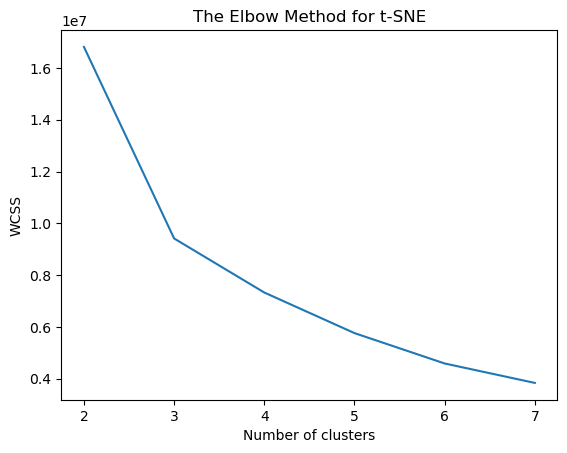

In [27]:
elbow_method_analysis(X_tsne_reduced)

## Clustering

In [28]:
# Trackers throughout each model
scores = {} # to track the silhoutte score of the tuned model
food_groups = {} # to track the counts of each group

In [29]:
X_with_labels = X.copy()
X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
4          0.913731         0.870851    0.476131        0.745258   
...             ...              ...         ...             ...   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8112       0.642026         0.626764    0.305234        0.000000   
8113       0.817624         0.893283    0.324179        0.024556   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
4                           0.676104                        0.443583   
...                              ...                             ...   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8112                        0.000000                        0.000000   
8113                        0.002465                        0.005934   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.014394  
3                     0.014394  
4                     0.348734  
...                        ...  
8110                  0.129330  
8111                  0.129330  
8112                  0.000000  
8113                  0.009211  
8114                  0.275650  

[8115 rows x 7 columns]

## K Means Clustering

In [30]:
from clustering_function import perform_kmeans_clustering, plot_clusters

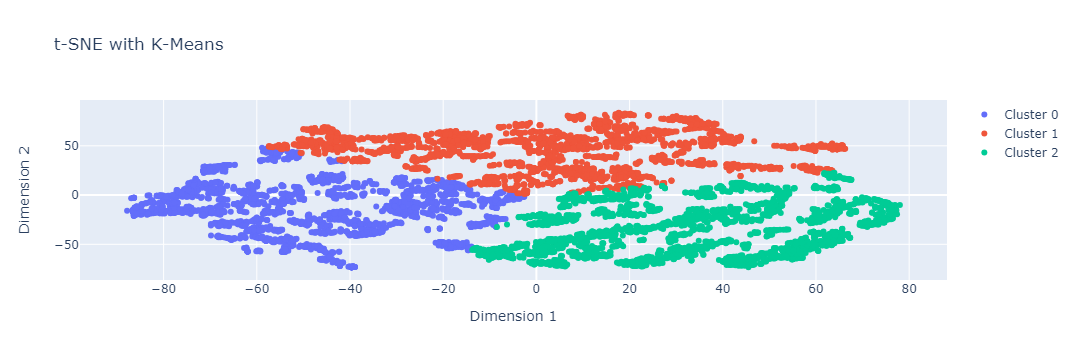

In [31]:
tsne_clust_labels, kmean_model = perform_kmeans_clustering(X_tsne_reduced, 3)
plot_clusters(X_tsne_reduced, tsne_clust_labels, 'K-Means')

In [32]:
# export model
with open('../Model_fitted/Kmeans_model_removeRow_pkl', 'wb') as files:
    pickle.dump(kmean_model, files)

In [33]:
X_with_labels['kmeans_tsne'] = tsne_clust_labels
scores['kmeans_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['kmeans_tsne']))

X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
4          0.913731         0.870851    0.476131        0.745258   
...             ...              ...         ...             ...   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8112       0.642026         0.626764    0.305234        0.000000   
8113       0.817624         0.893283    0.324179        0.024556   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
4                           0.676104                        0.443583   
...                              ...                             ...   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8112                        0.000000                        0.000000   
8113                        0.002465                        0.005934   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            0  
1                     0.212894            2  
2                     0.014394            0  
3                     0.014394            0  
4                     0.348734            1  
...                        ...          ...  
8110                  0.129330            0  
8111                  0.129330            0  
8112                  0.000000            0  
8113                  0.009211            0  
8114                  0.275650            1  

[8115 rows x 8 columns]

In [34]:
from clustering_function import get_food_groups, plot_cluster_distribution

In [35]:
food_groups, value_counts = get_food_groups(X_with_labels['kmeans_tsne'], 'KMeans_tsne',food_groups)

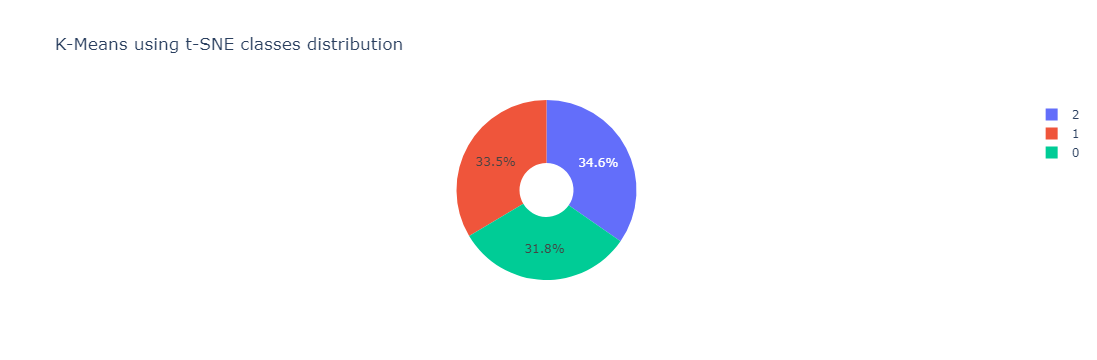

In [36]:
plot_cluster_distribution(value_counts, 'K-Means')

In [37]:
kmeans_tsne = X_with_labels.groupby('kmeans_tsne')

In [38]:
n = kmeans_tsne['kmeans_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(kmeans_tsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
5          0.670663         0.503637    0.457547        0.324453   
11         0.836114         0.000000    0.000000        0.000000   
...             ...              ...         ...             ...   
8109       0.656199         0.583869    0.396246        0.175712   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8112       0.642026         0.626764    0.305234        0.000000   
8113       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
5                           0.222082                        0.060118   
11                          0.000000                        0.000000   
...                              ...                             ...   
8109                        0.061346                        0.007953   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8112                        0.000000                        0.000000   
8113                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            0  
2                     0.014394            0  
3                     0.014394            0  
5                     0.180322            0  
11                    0.000000            0  
...                        ...          ...  
8109                  0.122689            0  
8110                  0.129330            0  
8111                  0.129330            0  
8112                  0.000000            0  
8113                  0.009211            0  

[2583 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
4          0.913731         0.870851    0.476131        0.745258   
6          0.916054         0.866962    0.491577        0.753711   
7          0.875881         0.808581    0.437893        0.696246   
8          0.904365         0.529205    0.512571        0.822403   
9          0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8034       0.834115         0.883149    0.529703        0.198541   
8042       0.753763         0.650193    0.611561        0.424712   
8072       0.859894         0.897421    0.719463        0.181414   
8074       0.858196         0.937465    0.463454        0.219193   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
4                           0.676104                        0.443583   
6                           0.684742                        0.451553   
7                           0.626129                        0.398092   
8                           0.632893                        0.671998   
9                           0.615989                        0.517992   
...                              ...                             ...   
8034                        0.040132                        0.110093   
8042                        0.223756                        0.326182   
8072                        0.024320                        0.103539   
8074                        0.080576                        0.140080   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
4                     0.348734            1  
6                     0.355775            1  
7                     0.308817            1  
8                     0.494853            1  
9                     0.473315            1  
...                        ...          ...  
8034                  0.051085            1  
8042                  0.140432            1  
8072                  0.063870            1  
8074                  0.000000            1  
8114                  0.275650            1  

[2722 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
10         0.816493         0.139076    0.695060        0.644735   
61         0.786376         0.000000    0.756312        0.513785   
62         0.717455         0.000000    0.681411        0.382380   
63         0.999184         0.000000    0.000000        0.998925   
...             ...              ...         ...             ...   
8060       0.742001         0.353022    0.611561        0.496744   
8061       0.776288         0.412147    0.653097        0.543778   
8075       0.733270         0.000000    0.708751        0.396735   
8096       0.632419         0.346116    0.532774        0.232190   
8098       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
10                          0.511857                        0.352783   
61                          0.351960                        0.293664   
62                          0.175770                        0.224155   
63                          0.861886                        0.577201   
...                              ...                             ...   
8060                        0.247492                        0.394092   
8061                        0.282218                        0.443141   
8075                        0.246740                        0.204303   
8096                        0.089229                        0.016934   
8098                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  
1                     0.212894            2  
10                    0.395637            2  
61                    0.254692            2  
62                    0.180514            2  
63                    0.807114            2  
...                        ...          ...  
8060                  0.182233            2  
8061                  0.209057            2  
8075                  0.180322            2  
8096                  0.175470            2  
8098                  0.267429            2  

[2810 rows x 8 columns]

In [39]:
for i in range(0,n):
    display(kmeans_tsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2583.000000      2583.000000  2583.000000     2583.000000   
mean        0.603082         0.518726     0.250985        0.108342   
std         0.140252         0.217169     0.177118        0.104318   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.534489         0.400521     0.118121        0.024556   
50%         0.615608         0.532199     0.232358        0.071353   
75%         0.682424         0.649653     0.348720        0.166866   
max         0.881090         1.000000     1.000000        0.452995   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2583.000000                     2583.000000   
mean                         0.039525                        0.040548   
std                          0.057665                        0.049187   
min                          0.000000                        0.000000   
25%                          0.002018                        0.007282   
50%                          0.009052                        0.023291   
75%                          0.056753                        0.056072   
max                          0.302104                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2583.000000       2583.0  
mean                   0.043774          0.0  
std                    0.064183          0.0  
min                    0.000000          0.0  
25%                    0.003903          0.0  
50%                    0.014394          0.0  
75%                    0.052553          0.0  
max                    0.350064          0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2722.000000      2722.000000  2722.000000     2722.000000   
mean        0.863100         0.797088     0.459834        0.540692   
std         0.056520         0.199513     0.166370        0.197818   
min         0.647502         0.000000     0.000000        0.000000   
25%         0.828473         0.720622     0.383500        0.395342   
50%         0.869694         0.871007     0.481570        0.549171   
75%         0.902481         0.927265     0.561710        0.677931   
max         1.000000         0.983026     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2722.000000                     2722.000000   
mean                         0.344457                        0.314988   
std                          0.197367                        0.195660   
min                          0.000000                        0.000000   
25%                          0.206351                        0.165945   
50%                          0.335251                        0.274597   
75%                          0.460292                        0.428964   
max                          0.984335                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2722.000000       2722.0  
mean                   0.310700          1.0  
std                    0.175123          0.0  
min                    0.000000          1.0  
25%                    0.157962          1.0  
50%                    0.308924          1.0  
75%                    0.433493          1.0  
max                    0.903884          1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2810.000000      2810.000000  2810.000000     2810.000000   
mean        0.780788         0.074049     0.682972        0.524555   
std         0.063201         0.147120     0.113783        0.158889   
min         0.606421         0.000000     0.000000        0.186054   
25%         0.736239         0.000000     0.663873        0.406661   
50%         0.776288         0.000000     0.700580        0.510009   
75%         0.814782         0.056849     0.741990        0.629568   
max         1.000000         0.745605     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2810.000000                     2810.000000   
mean                         0.365650                        0.172523   
std                          0.153883                        0.119648   
min                          0.000000                        0.000000   
25%                          0.251824                        0.082887   
50%                          0.355126                        0.133816   
75%                          0.466754                        0.232358   
max                          1.000000                        0.669815   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2810.000000       2810.0  
mean                   0.336830          2.0  
std                    0.160469          0.0  
min                    0.049695          2.0  
25%                    0.217314          2.0  
50%                    0.312624          2.0  
75%                    0.431576          2.0  
max                    1.000000          2.0

### Insights

- Cluster 0 shows the lowest mean of the fat as well as the fatty acid, but moderate values for other nutrition.
- Cluster 1 contains the highest mean of energy values following with the highest values of carbohydrates. 
- Cluster 2 has the high value of energy values and highest values of the protein, show that it is a good suggested food group for fitness people.

## Agglomerative Clustering

In [40]:
from clustering_function import tuning_agglomerative, perform_agg_clustering

In [41]:
agg_param_grid = {
      'n_clusters': [2, 3, 4, 5, 6],
      'linkage': ['ward'],
      'affinity' : ['euclidean']
  }

In [42]:
tuning_agglomerative(X_tsne_reduced, agg_param_grid)

Best silhouette score: 0.39661264
Best parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}


In [43]:
Agg_tsne_clust_labels,agg_model = perform_agg_clustering(X_tsne_reduced, 3)

In [44]:
# export model
with open('../Model_fitted/Agg_model_removeRow_pkl', 'wb') as files:
    pickle.dump(agg_model, files)

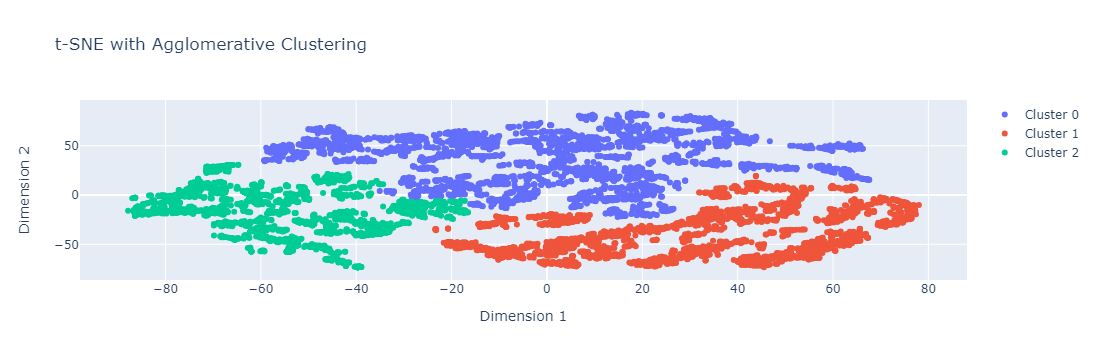

In [45]:
plot_clusters(X_tsne_reduced, Agg_tsne_clust_labels, "Agglomerative Clustering")

In [46]:
X_with_labels['Agg_tsne'] = Agg_tsne_clust_labels
scores['Agg_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Agg_tsne']))

In [47]:
food_groups, value_counts = get_food_groups(X_with_labels['Agg_tsne'], 'Agglomerative_tsne',food_groups)

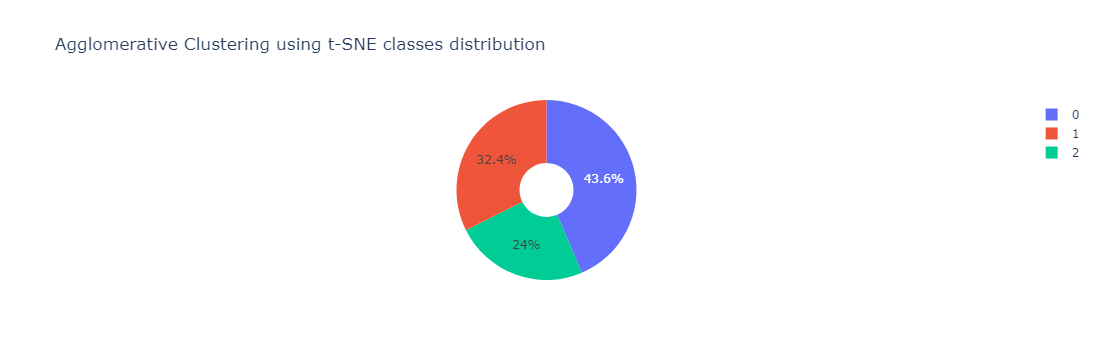

In [48]:
plot_cluster_distribution(value_counts, 'Agglomerative Clustering')

In [49]:
Aggtsne = X_with_labels.groupby('Agg_tsne')

In [50]:
n = Aggtsne['Agg_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Aggtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
4          0.913731         0.870851    0.476131        0.745258   
5          0.670663         0.503637    0.457547        0.324453   
6          0.916054         0.866962    0.491577        0.753711   
7          0.875881         0.808581    0.437893        0.696246   
...             ...              ...         ...             ...   
8109       0.656199         0.583869    0.396246        0.175712   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8113       0.817624         0.893283    0.324179        0.024556   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
4                           0.676104                        0.443583   
5                           0.222082                        0.060118   
6                           0.684742                        0.451553   
7                           0.626129                        0.398092   
...                              ...                             ...   
8109                        0.061346                        0.007953   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8113                        0.002465                        0.005934   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
1                     0.212894            2         0  
4                     0.348734            1         0  
5                     0.180322            0         0  
6                     0.355775            1         0  
7                     0.308817            1         0  
...                        ...          ...       ...  
8109                  0.122689            0         0  
8110                  0.129330            0         0  
8111                  0.129330            0         0  
8113                  0.009211            0         0  
8114                  0.275650            1         0  

[3536 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
10         0.816493         0.139076    0.695060        0.644735   
61         0.786376         0.000000    0.756312        0.513785   
62         0.717455         0.000000    0.681411        0.382380   
72         0.770972         0.000000    0.740576        0.500649   
...             ...              ...         ...             ...   
8058       0.690666         0.373287    0.676669        0.170842   
8062       0.693313         0.000000    0.737760        0.087856   
8075       0.733270         0.000000    0.708751        0.396735   
8096       0.632419         0.346116    0.532774        0.232190   
8098       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
10                          0.511857                        0.352783   
61                          0.351960                        0.293664   
62                          0.175770                        0.224155   
72                          0.377811                        0.098613   
...                              ...                             ...   
8058                        0.021471                        0.093733   
8062                        0.065427                        0.005708   
8075                        0.246740                        0.204303   
8096                        0.089229                        0.016934   
8098                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
0                     0.030388            0         1  
10                    0.395637            2         1  
61                    0.254692            2         1  
62                    0.180514            2         1  
72                    0.327957            2         1  
...                        ...          ...       ...  
8058                  0.039890            0         1  
8062                  0.019256            0         1  
8075                  0.180322            2         1  
8096                  0.175470            2         1  
8098                  0.267429            2         1  

[2628 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
11         0.836114         0.000000    0.000000        0.000000   
12         0.499756         0.210347    0.047885        0.000000   
13         0.565722         0.123719    0.049673        0.000000   
...             ...              ...         ...             ...   
8104       0.611086         0.451652    0.407945        0.202832   
8105       0.594066         0.468248    0.424417        0.035864   
8107       0.556031         0.463708    0.351950        0.035864   
8108       0.556031         0.463708    0.351950        0.035864   
8112       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
11                          0.000000                        0.000000   
12                          0.000000                        0.000000   
13                          0.000000                        0.000000   
...                              ...                             ...   
8104                        0.079945                        0.009954   
8105                        0.010777                        0.001153   
8107                        0.010777                        0.001153   
8108                        0.010777                        0.001153   
8112                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
2                     0.014394            0         2  
3                     0.014394            0         2  
11                    0.000000            0         2  
12                    0.000000            0         2  
13                    0.000000            0         2  
...                        ...          ...       ...  
8104                  0.151654            0         2  
8105                  0.024012            0         2  
8107                  0.024012            0         2  
8108                  0.024012            0         2  
8112                  0.000000            0         2  

[1951 rows x 9 columns]

In [51]:
for i in range(0,n):
    display(Aggtsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3536.000000      3536.000000  3536.000000     3536.000000   
mean        0.836899         0.731471     0.453631        0.507748   
std         0.083784         0.243924     0.175616        0.211941   
min         0.556031         0.000000     0.000000        0.000000   
25%         0.795816         0.618844     0.362680        0.339434   
50%         0.858196         0.828642     0.474552        0.515598   
75%         0.893019         0.919201     0.568868        0.651295   
max         1.000000         0.985655     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3536.000000                     3536.000000   
mean                         0.318662                        0.285023   
std                          0.200186                        0.195230   
min                          0.000000                        0.000000   
25%                          0.162480                        0.135881   
50%                          0.301603                        0.245334   
75%                          0.436340                        0.398258   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               3536.000000  3536.000000    3536.0  
mean                   0.291415     0.962952       0.0  
std                    0.183329     0.479317       0.0  
min                    0.000000     0.000000       0.0  
25%                    0.141552     1.000000       0.0  
50%                    0.279037     1.000000       0.0  
75%                    0.407393     1.000000       0.0  
max                    1.000000     2.000000       0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2628.000000      2628.000000  2628.000000     2628.000000   
mean        0.771426         0.047494     0.698391        0.492842   
std         0.062104         0.108896     0.069281        0.172076   
min         0.509238         0.000000     0.237012        0.000000   
25%         0.728185         0.000000     0.669965        0.375597   
50%         0.770972         0.000000     0.704703        0.487351   
75%         0.810117         0.006405     0.743593        0.618376   
max         0.984573         0.585474     1.000000        0.974267   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2628.000000                     2628.000000   
mean                         0.343274                        0.146315   
std                          0.163723                        0.100448   
min                          0.000000                        0.000000   
25%                          0.229177                        0.074457   
50%                          0.336772                        0.116675   
75%                          0.463092                        0.190375   
max                          0.923391                        0.629091   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               2628.000000  2628.000000    2628.0  
mean                   0.317291     1.878615       1.0  
std                    0.158868     0.476425       0.0  
min                    0.000000     0.000000       1.0  
25%                    0.201175     2.000000       1.0  
50%                    0.300528     2.000000       1.0  
75%                    0.429558     2.000000       1.0  
max                    0.786175     2.000000       1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1951.000000      1951.000000  1951.000000     1951.000000   
mean        0.571272         0.515798     0.194619        0.069206   
std         0.140986         0.192595     0.137189        0.067631   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.504573         0.399152     0.084243        0.020652   
50%         0.580577         0.524058     0.176526        0.046610   
75%         0.649283         0.639985     0.285145        0.097739   
max         0.881090         1.000000     0.715473        0.335324   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1951.000000                     1951.000000   
mean                         0.019615                        0.027967   
std                          0.033761                        0.034297   
min                          0.000000                        0.000000   
25%                          0.001124                        0.004918   
50%                          0.004902                        0.016288   
75%                          0.018586                        0.038752   
max                          0.260760                        0.235029   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               1951.000000       1951.0    1951.0  
mean                   0.021017          0.0       2.0  
std                    0.032897          0.0       0.0  
min                    0.000000          0.0       2.0  
25%                    0.002610          0.0       2.0  
50%                    0.008581          0.0       2.0  
75%                    0.023227          0.0       2.0  
max                    0.261484          0.0       2.0

### Insights

- Cluster 0 has the highest value of energy values and highest values of the carbohydrates, which may be needed for athletes.
- Cluster 1 contains the high mean of energy values,highest values of protein and lowest values of carbohydrate, providing a good suggestion for fitness people. 
- Cluster 2 shows the lowest mean of the fat as well as the fatty acid, but moderate values for other nutrition, considered a healthy food group.

## GMM

In [52]:
from clustering_function import gmm_bic_score, perform_gmm_clustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [53]:
gmm_param_grid = {
    "n_components": range(1, 6),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=gmm_param_grid, scoring=gmm_bic_score
)

In [54]:
grid_search.fit(X_tsne_reduced)
Gmm_tsne_results = grid_search.cv_results_

In [55]:
Gmm_tsne_df = pd.DataFrame(Gmm_tsne_results)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
Gmm_tsne_df["mean_test_score"] = -Gmm_tsne_df["mean_test_score"]
Gmm_tsne_df = Gmm_tsne_df.rename(
    columns={
        "param_n_components": "Number of Components",
        "param_covariance_type": "Type of Covariance",
        "mean_test_score": "BIC Score",
    }
)
Gmm_tsne_df.sort_values(by="BIC Score").head()

Number of Components Type of Covariance     BIC Score
12                    3               diag  33454.861048
2                     3          spherical  33469.206209
7                     3               tied  33469.738835
14                    5               diag  33490.807610
4                     5          spherical  33491.560326

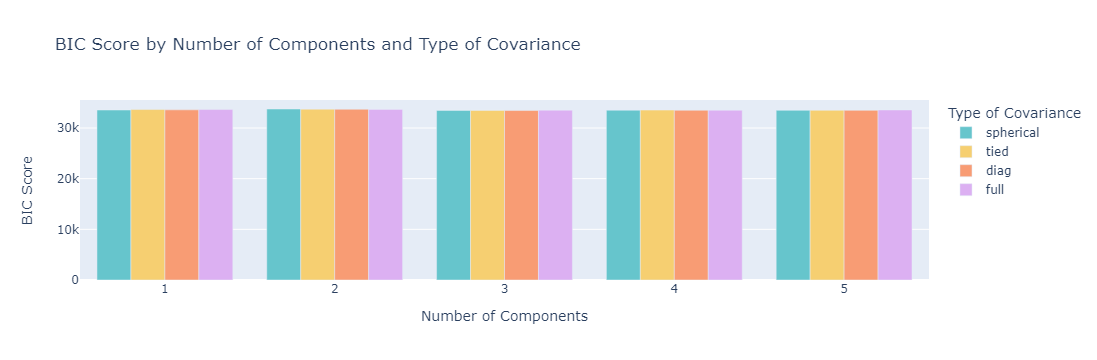

In [56]:
fig = px.bar(Gmm_tsne_df, x="Number of Components", y="BIC Score",
                 color="Type of Covariance", barmode="group",
                 title="BIC Score by Number of Components and Type of Covariance",
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [57]:
Gmm_tsne_labels,gmm_model = perform_gmm_clustering(X_tsne_reduced, 3, 'spherical')

In [58]:
# export model
with open('../Model_fitted/Gmm_model_removeRow_pkl', 'wb') as files:
    pickle.dump(gmm_model, files)

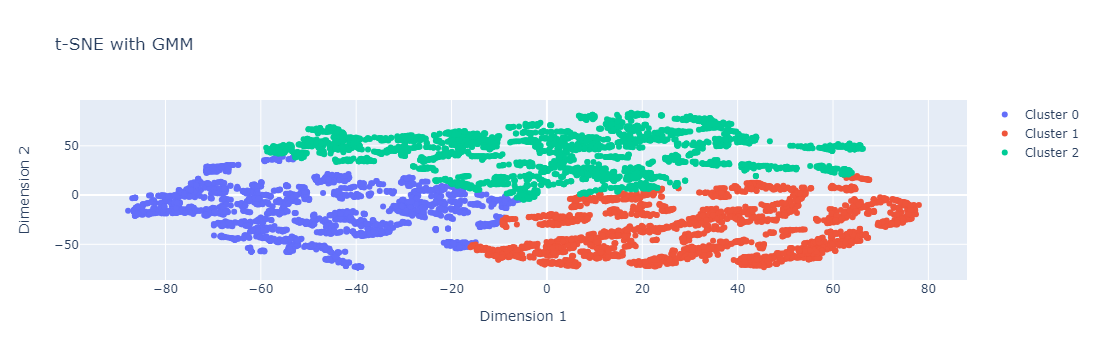

In [59]:
plot_clusters(X_tsne_reduced, Gmm_tsne_labels, "GMM")

In [60]:
X_with_labels['Gmm_tsne'] = Gmm_tsne_labels
scores['Gmm_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Gmm_tsne']))

In [61]:
food_groups, value_counts = get_food_groups(X_with_labels['Gmm_tsne'], 'GMM_tsne',food_groups)

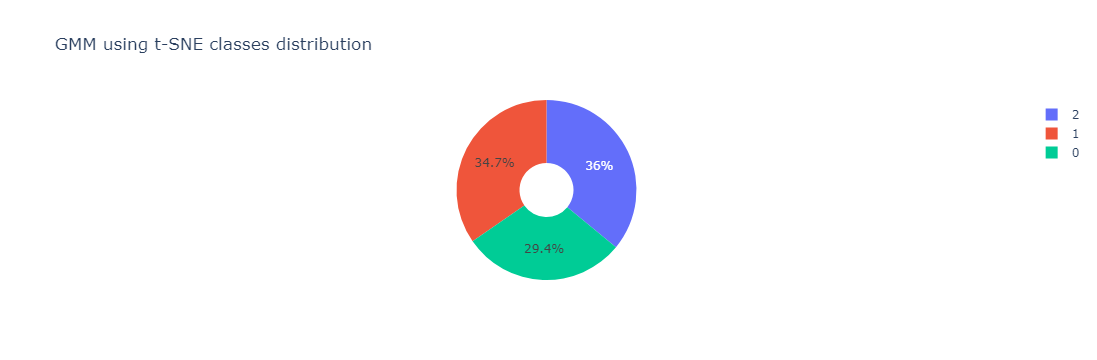

In [62]:
plot_cluster_distribution(value_counts, 'GMM')

In [63]:
GmmTsne = X_with_labels.groupby('Gmm_tsne')

In [64]:
n = GmmTsne['Gmm_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(GmmTsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
11         0.836114         0.000000    0.000000        0.000000   
12         0.499756         0.210347    0.047885        0.000000   
...             ...              ...         ...             ...   
8109       0.656199         0.583869    0.396246        0.175712   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8112       0.642026         0.626764    0.305234        0.000000   
8113       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
11                          0.000000                        0.000000   
12                          0.000000                        0.000000   
...                              ...                             ...   
8109                        0.061346                        0.007953   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8112                        0.000000                        0.000000   
8113                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
0                     0.030388            0         1         0  
2                     0.014394            0         2         0  
3                     0.014394            0         2         0  
11                    0.000000            0         2         0  
12                    0.000000            0         2         0  
...                        ...          ...       ...       ...  
8109                  0.122689            0         0         0  
8110                  0.129330            0         0         0  
8111                  0.129330            0         0         0  
8112                  0.000000            0         2         0  
8113                  0.009211            0         0         0  

[2384 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
10         0.816493         0.139076    0.695060        0.644735   
61         0.786376         0.000000    0.756312        0.513785   
62         0.717455         0.000000    0.681411        0.382380   
63         0.999184         0.000000    0.000000        0.998925   
...             ...              ...         ...             ...   
8060       0.742001         0.353022    0.611561        0.496744   
8061       0.776288         0.412147    0.653097        0.543778   
8075       0.733270         0.000000    0.708751        0.396735   
8096       0.632419         0.346116    0.532774        0.232190   
8098       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
10                          0.511857                        0.352783   
61                          0.351960                        0.293664   
62                          0.175770                        0.224155   
63                          0.861886                        0.577201   
...                              ...                             ...   
8060                        0.247492                        0.394092   
8061                        0.282218                        0.443141   
8075                        0.246740                        0.204303   
8096                        0.089229                        0.016934   
8098                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
1                     0.212894            2         0         1  
10                    0.395637            2         1         1  
61                    0.254692            2         1         1  
62                    0.180514            2         1         1  
63                    0.807114            2         0         1  
...                        ...          ...       ...       ...  
8060                  0.182233            2         0         1  
8061                  0.209057            2         0         1  
8075                  0.180322            2         1         1  
8096                  0.175470            2         1         1  
8098                  0.267429            2         1         1  

[2813 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
4          0.913731         0.870851    0.476131        0.745258   
5          0.670663         0.503637    0.457547        0.324453   
6          0.916054         0.866962    0.491577        0.753711   
7          0.875881         0.808581    0.437893        0.696246   
8          0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8042       0.753763         0.650193    0.611561        0.424712   
8072       0.859894         0.897421    0.719463        0.181414   
8074       0.858196         0.937465    0.463454        0.219193   
8091       0.686603         0.560551    0.471896        0.300381   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
4                           0.676104                        0.443583   
5                           0.222082                        0.060118   
6                           0.684742                        0.451553   
7                           0.626129                        0.398092   
8                           0.632893                        0.671998   
...                              ...                             ...   
8042                        0.223756                        0.326182   
8072                        0.024320                        0.103539   
8074                        0.080576                        0.140080   
8091                        0.184181                        0.045779   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
4                     0.348734            1         0         2  
5                     0.180322            0         0         2  
6                     0.355775            1         0         2  
7                     0.308817            1         0         2  
8                     0.494853            1         0         2  
...                        ...          ...       ...       ...  
8042                  0.140432            1         0         2  
8072                  0.063870            1         0         2  
8074                  0.000000            1         0         2  
8091                  0.208973            0         0         2  
8114                  0.275650            1         0         2  

[2918 rows x 10 columns]

In [65]:
for i in range(0,n):
    display(GmmTsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2384.000000      2384.000000  2384.000000     2384.000000   
mean        0.590379         0.507634     0.233700        0.098410   
std         0.136532         0.208068     0.166499        0.095794   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.526545         0.393763     0.108761        0.022613   
50%         0.606421         0.523478     0.217363        0.063415   
75%         0.669125         0.642513     0.323139        0.150190   
max         0.881090         1.000000     0.993116        0.421638   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2384.000000                     2384.000000   
mean                         0.033808                        0.035219   
std                          0.050188                        0.040581   
min                          0.000000                        0.000000   
25%                          0.001795                        0.006833   
50%                          0.007967                        0.020769   
75%                          0.048460                        0.048654   
max                          0.279629                        0.235029   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               2384.000000       2384.0  2384.000000    2384.0  
mean                   0.039969          0.0     1.687919       0.0  
std                    0.061887          0.0     0.689777       0.0  
min                    0.000000          0.0     0.000000       0.0  
25%                    0.003688          0.0     2.000000       0.0  
50%                    0.012749          0.0     2.000000       0.0  
75%                    0.042518          0.0     2.000000       0.0  
max                    0.350064          0.0     2.000000       0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2813.000000      2813.000000  2813.000000     2813.000000   
mean        0.778886         0.072799     0.687111        0.517435   
std         0.061885         0.142943     0.104310        0.160775   
min         0.606421         0.000000     0.000000        0.000000   
25%         0.735256         0.000000     0.665307        0.401543   
50%         0.774789         0.000000     0.701916        0.506167   
75%         0.813629         0.056849     0.742486        0.625560   
max         1.000000         0.672310     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2813.000000                     2813.000000   
mean                         0.359178                        0.167669   
std                          0.152940                        0.115008   
min                          0.000000                        0.000000   
25%                          0.247417                        0.081388   
50%                          0.351487                        0.131472   
75%                          0.463784                        0.226337   
max                          0.971727                        0.669815   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               2813.000000  2813.000000  2813.000000    2813.0  
mean                   0.332070     1.974405     0.889797       1.0  
std                    0.161232     0.224842     0.313198       0.0  
min                    0.000000     0.000000     0.000000       1.0  
25%                    0.213225     2.000000     1.000000       1.0  
50%                    0.309350     2.000000     1.000000       1.0  
75%                    0.428079     2.000000     1.000000       1.0  
max                    1.000000     2.000000     1.000000       1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2918.000000      2918.000000  2918.000000     2918.000000   
mean        0.857664         0.789114     0.455494        0.526201   
std         0.063694         0.206030     0.166978        0.207854   
min         0.617817         0.000000     0.000000        0.000000   
25%         0.823824         0.705461     0.379590        0.373867   
50%         0.868105         0.865928     0.476786        0.537794   
75%         0.901212         0.927475     0.558654        0.670207   
max         1.000000         0.983026     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2918.000000                     2918.000000   
mean                         0.334550                        0.305451   
std                          0.202654                        0.196971   
min                          0.000000                        0.000000   
25%                          0.188612                        0.156303   
50%                          0.322539                        0.262554   
75%                          0.453911                        0.422150   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               2918.000000  2918.000000  2918.000000    2918.0  
mean                   0.300167     0.955449     0.001028       2.0  
std                    0.179323     0.255356     0.032053       0.0  
min                    0.000000     0.000000     0.000000       2.0  
25%                    0.143519     1.000000     0.000000       2.0  
50%                    0.297685     1.000000     0.000000       2.0  
75%                    0.425934     1.000000     0.000000       2.0  
max                    0.903884     2.000000     1.000000       2.0

### Insights

- Cluster 0 has the lowest mean of the fat as well as the fatty acid, but moderate values for other nutrition, assumed as healthy food group.
- Cluster 1 contains high values of energy and highest content of protein, means the food group is rich in protein that is suitable for fitness people.
- Cluster 2 indicates highest values of energy and carbohydrate, shows that this kind of food group may be required by those people who need to store huge amount of energy in body.

## K-Medoids

In [66]:
from clustering_function import tuning_kmedoids, perform_kmd_clustering

In [67]:
kmd_param_grid = {
    'n_clusters': [3, 4],
    'method': ['alternate', 'pam'],
    'init' : ['random', 'heuristic', 'k-medoids++', 'build']
}

In [68]:
tuning_kmedoids(X_tsne_reduced, kmd_param_grid)

Best silhouette score: 0.42725366
Best parameters: {'init': 'random', 'method': 'pam', 'n_clusters': 3}


In [69]:
Kmd_tsne_labels, kmd_model = perform_kmd_clustering(X_tsne_reduced, 3, 'random', 'alternate')

In [70]:
# export model
with open('../Model_fitted/Kmd_model_removeRow_pkl', 'wb') as files:
    pickle.dump(kmd_model, files)

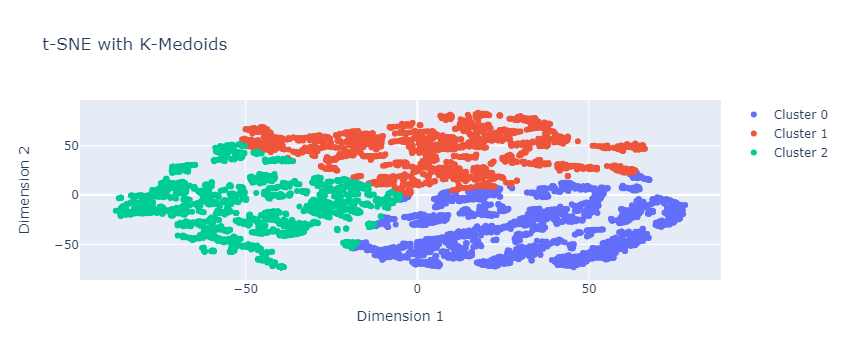

In [71]:
plot_clusters(X_tsne_reduced, Kmd_tsne_labels, "K-Medoids")

In [72]:
X_with_labels['Kmd_tsne'] = Kmd_tsne_labels
scores['Kmd_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Kmd_tsne']))

In [73]:
food_groups, value_counts = get_food_groups(X_with_labels['Kmd_tsne'], 'KMedoids_tsne',food_groups)

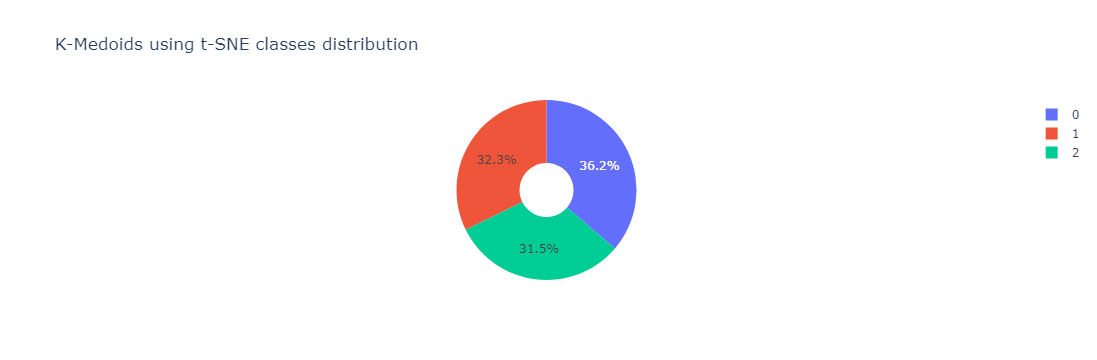

In [74]:
plot_cluster_distribution(value_counts, 'K-Medoids')

In [75]:
Kmdtsne = X_with_labels.groupby('Kmd_tsne')

In [76]:
n = Kmdtsne['Kmd_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Kmdtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
10         0.816493         0.139076    0.695060        0.644735   
61         0.786376         0.000000    0.756312        0.513785   
62         0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8061       0.776288         0.412147    0.653097        0.543778   
8062       0.693313         0.000000    0.737760        0.087856   
8075       0.733270         0.000000    0.708751        0.396735   
8096       0.632419         0.346116    0.532774        0.232190   
8098       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
10                          0.511857                        0.352783   
61                          0.351960                        0.293664   
62                          0.175770                        0.224155   
...                              ...                             ...   
8061                        0.282218                        0.443141   
8062                        0.065427                        0.005708   
8075                        0.246740                        0.204303   
8096                        0.089229                        0.016934   
8098                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
0                     0.030388            0         1         0         0  
1                     0.212894            2         0         1         0  
10                    0.395637            2         1         1         0  
61                    0.254692            2         1         1         0  
62                    0.180514            2         1         1         0  
...                        ...          ...       ...       ...       ...  
8061                  0.209057            2         0         1         0  
8062                  0.019256            0         1         0         0  
8075                  0.180322            2         1         1         0  
8096                  0.175470            2         1         1         0  
8098                  0.267429            2         1         1         0  

[2941 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
4          0.913731         0.870851    0.476131        0.745258   
6          0.916054         0.866962    0.491577        0.753711   
7          0.875881         0.808581    0.437893        0.696246   
8          0.904365         0.529205    0.512571        0.822403   
9          0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8021       0.864057         0.938094    0.613409        0.158689   
8029       0.883985         0.813507    0.761901        0.617939   
8072       0.859894         0.897421    0.719463        0.181414   
8074       0.858196         0.937465    0.463454        0.219193   
8114       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
4                           0.676104                        0.443583   
6                           0.684742                        0.451553   
7                           0.626129                        0.398092   
8                           0.632893                        0.671998   
9                           0.615989                        0.517992   
...                              ...                             ...   
8021                        0.033241                        0.119380   
8029                        0.438754                        0.386834   
8072                        0.024320                        0.103539   
8074                        0.080576                        0.140080   
8114                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
4                     0.348734            1         0         2         1  
6                     0.355775            1         0         2         1  
7                     0.308817            1         0         2         1  
8                     0.494853            1         0         2         1  
9                     0.473315            1         0         2         1  
...                        ...          ...       ...       ...       ...  
8021                  0.031717            1         0         2         1  
8029                  0.261418            1         0         2         1  
8072                  0.063870            1         0         2         1  
8074                  0.000000            1         0         2         1  
8114                  0.275650            1         0         2         1  

[2619 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.466968         0.380891    0.074901        0.056849   
3          0.513760         0.468498    0.074901        0.056849   
5          0.670663         0.503637    0.457547        0.324453   
11         0.836114         0.000000    0.000000        0.000000   
12         0.499756         0.210347    0.047885        0.000000   
...             ...              ...         ...             ...   
8109       0.656199         0.583869    0.396246        0.175712   
8110       0.654500         0.583869    0.396246        0.175712   
8111       0.654500         0.583869    0.396246        0.175712   
8112       0.642026         0.626764    0.305234        0.000000   
8113       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.017754                        0.019922   
3                           0.017754                        0.019922   
5                           0.222082                        0.060118   
11                          0.000000                        0.000000   
12                          0.000000                        0.000000   
...                              ...                             ...   
8109                        0.061346                        0.007953   
8110                        0.066435                        0.008176   
8111                        0.066435                        0.008176   
8112                        0.000000                        0.000000   
8113                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
2                     0.014394            0         2         0         2  
3                     0.014394            0         2         0         2  
5                     0.180322            0         0         2         2  
11                    0.000000            0         2         0         2  
12                    0.000000            0         2         0         2  
...                        ...          ...       ...       ...       ...  
8109                  0.122689            0         0         0         2  
8110                  0.129330            0         0         0         2  
8111                  0.129330            0         0         0         2  
8112                  0.000000            0         2         0         2  
8113                  0.009211            0         0         0         2  

[2555 rows x 11 columns]

In [77]:
for i in range(0,n):
    display(Kmdtsne.get_group(i).describe())

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2941.000000      2941.000000  2941.000000     2941.000000   
mean        0.777988         0.085792     0.680966        0.512912   
std         0.064570         0.162767     0.117495        0.167876   
min         0.606421         0.000000     0.000000        0.000000   
25%         0.733270         0.000000     0.662146        0.395342   
50%         0.774034         0.000000     0.699910        0.503849   
75%         0.813629         0.087856     0.741533        0.625076   
max         1.000000         0.757094     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2941.000000                     2941.000000   
mean                         0.354525                        0.171966   
std                          0.160309                        0.121397   
min                          0.000000                        0.000000   
25%                          0.241788                        0.081388   
50%                          0.347139                        0.132256   
75%                          0.460161                        0.232928   
max                          1.000000                        0.669815   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2941.000000  2941.000000  2941.000000  2941.000000   
mean                   0.326271     1.919075     0.869772     1.006120   
std                    0.165090     0.382766     0.336611     0.208566   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.206518     2.000000     1.000000     1.000000   
50%                    0.304943     2.000000     1.000000     1.000000   
75%                    0.423232     2.000000     1.000000     1.000000   
max                    1.000000     2.000000     1.000000     2.000000   

       Kmd_tsne  
count    2941.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2619.000000      2619.000000  2619.000000     2619.000000   
mean        0.864243         0.794759     0.455967        0.551225   
std         0.057040         0.202551     0.167794        0.191914   
min         0.647502         0.000000     0.000000        0.000000   
25%         0.830033         0.719646     0.379489        0.411985   
50%         0.871265         0.871162     0.477178        0.555771   
75%         0.903426         0.926664     0.560277        0.682343   
max         1.000000         0.983026     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2619.000000                     2619.000000   
mean                         0.353557                        0.320565   
std                          0.194691                        0.195183   
min                          0.000000                        0.000000   
25%                          0.217024                        0.172997   
50%                          0.343785                        0.279617   
75%                          0.468154                        0.432711   
max                          0.984335                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  Kmd_tsne  
count               2619.000000  2619.000000  2619.000000    2619.0    2619.0  
mean                   0.319122     0.999618     0.001145       2.0       1.0  
std                    0.172530     0.033849     0.033832       0.0       0.0  
min                    0.000000     0.000000     0.000000       2.0       1.0  
25%                    0.171909     1.000000     0.000000       2.0       1.0  
50%                    0.319131     1.000000     0.000000       2.0       1.0  
75%                    0.438038     1.000000     0.000000       2.0       1.0  
max                    0.903884     2.000000     1.000000       2.0       1.0

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2555.000000      2555.000000  2555.000000     2555.000000   
mean        0.606505         0.541616     0.243529        0.107035   
std         0.145497         0.216773     0.162651        0.102295   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.534489         0.415038     0.116808        0.024556   
50%         0.613364         0.545881     0.232358        0.071353   
75%         0.685223         0.663063     0.345206        0.163326   
max         0.881090         1.000000     0.720077        0.436587   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2555.000000                     2555.000000   
mean                         0.038574                        0.039769   
std                          0.056567                        0.045851   
min                          0.000000                        0.000000   
25%                          0.002018                        0.007506   
50%                          0.009052                        0.023500   
75%                          0.055788                        0.056344   
max                          0.302104                        0.299623   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2555.000000  2555.000000  2555.000000  2555.000000   
mean                   0.043030     0.031311     1.553425     0.176908   
std                    0.063680     0.174191     0.817165     0.568019   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.003903     0.000000     2.000000     0.000000   
50%                    0.014189     0.000000     2.000000     0.000000   
75%                    0.050825     0.000000     2.000000     0.000000   
max                    0.350064     1.000000     2.000000     2.000000   

       Kmd_tsne  
count    2555.0  
mean        2.0  
std         0.0  
min         2.0  
25%         2.0  
50%         2.0  
75%         2.0  
max         2.0

### Insights

- Cluster 0 has the highest values of protein with high energy, means that the food group is suitable for fitness.
- 
Cluster 1 shows highest values of energy and carbohydrate for those who need greater energy in their daily activities.
- 
Cluster 2 contains the lowest value of lipid and fatty acid and moderate values of other nutrien, for those desire for healthy life stylets

In [78]:
scores

{'kmeans_tsne': 0.4268393,
 'Agg_tsne': 0.39661264,
 'Gmm_tsne': 0.42593384,
 'Kmd_tsne': 0.42475685}

The K-Means model was shown to be the most effective one when the dataset's missing values were handled by using the removing row approach.